In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import os
import json
from pathlib import Path

In [9]:
training_path = Path('training')
evaluation_path = Path('evaluation')
test_path = Path('test')

training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
test_tasks = sorted(os.listdir(test_path))
print(len(training_tasks), len(evaluation_tasks), len(test_tasks))

400 400 100


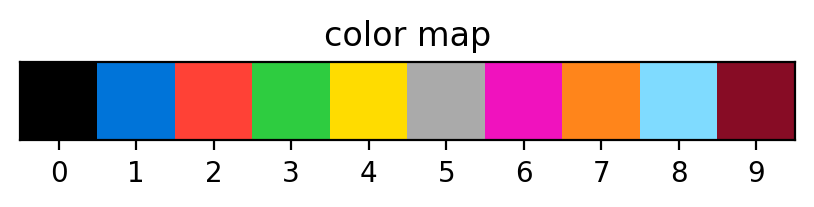

In [10]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.title('color map')
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, ax = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        ax[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        ax[0][fig_num].set_title(f'Train-{i} in')
        ax[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        ax[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        ax[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        ax[1][fig_num].set_title(f'Train-{i} out')
        ax[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        ax[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        ax[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        ax[0][fig_num].set_title(f'Test-{i} in')
        ax[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        ax[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        ax[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        ax[1][fig_num].set_title(f'Test-{i} out')
        ax[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        ax[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    # plt.title('Color maps')
    plt.show()
    

In [11]:
def load_task(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

num2color = ["black", "blue", "red", "green", "yellow", "gray", "magenta", "orange", "sky", "brown"]
color2num = {c: n for n, c in enumerate(num2color)}

In [12]:
def plot_results(task, pred_func):
    n = len(task["train"]) + len(task["test"])
    fig, ax = plt.subplots(3, n, figsize=(4*n,12), dpi=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        ax[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        ax[0][fig_num].set_title(f'Train-{i} in')
        ax[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        ax[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        ax[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        ax[1][fig_num].set_title(f'Train-{i} out')
        ax[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        ax[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        ax[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        ax[2][fig_num].set_title(f'Train-{i} pred')
        ax[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        ax[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        t_pred = pred_func(t_in)
        ax[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        ax[0][fig_num].set_title(f'Test-{i} in')
        ax[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        ax[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        ax[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        ax[1][fig_num].set_title(f'Test-{i} out')
        ax[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        ax[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        ax[2][fig_num].imshow(t_pred, cmap=cmap, norm=norm)
        ax[2][fig_num].set_title(f'Test-{i} pred')
        ax[2][fig_num].set_yticks(list(range(t_pred.shape[0])))
        ax[2][fig_num].set_xticks(list(range(t_pred.shape[1])))
        fig_num += 1

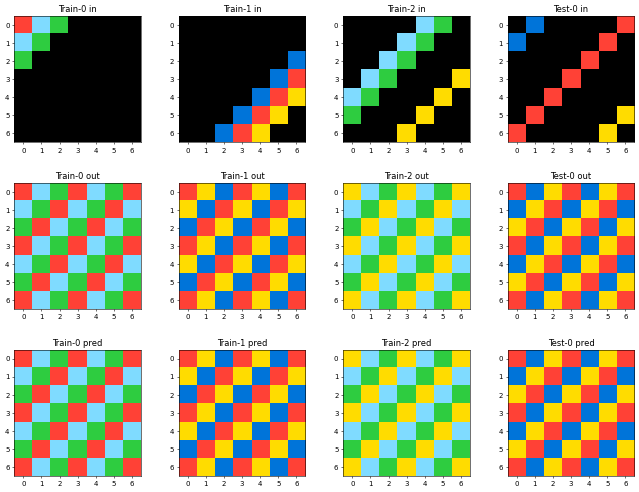

In [13]:
def modify_task(x):
    height, width = x.shape
    color_palette = [0, 0, 0]

    # Find distinct colors from the input grid
    for row in range(height):
        for col in range(width):
            color = x[row, col]
            if color != 0:
                color_palette[(row + col) % 3] = color

    # Assign colors based on the distinct colors found
    new_grid = x.copy()
    for row in range(height):
        for col in range(width):
            new_grid[row, col] = color_palette[(row + col) % 3]

    return new_grid

task = load_task(str(training_path / training_tasks[6]))
plot_results(task, modify_task)
